In [30]:
#training Data to predicts the value fir the dataset provided - Using Semi-supervised learning 

from keras.datasets import mnist 

(x_train, y_train),(x_test,y_test)=mnist.load_data()

img_row = x_train[0].shape[0]
img_col = x_train[0].shape[1]

x_train=x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test=x_test.reshape(x_test.shape[0], img_row, img_col, 1)

input_shape = (img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


from keras.utils import np_utils 

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

from keras import Sequential
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D , Flatten , Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape= input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1 , validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.9300 - accuracy: 0.6961 - val_loss: 0.1920 - val_accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3157 - accuracy: 0.9031 - val_loss: 0.1487 - val_accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2377 - accuracy: 0.9292 - val_loss: 0.1103 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1868 - accuracy: 0.9439 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1533 - accuracy: 0.9560 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1347 - accuracy: 0.9600 - val_loss: 0.0603 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1121 - accuracy: 0.9672 - val_loss: 0.0565 -

In [32]:
#Using Semi- Supervisied learning 
#First the 'Y' value of the image is estimated using the model trained in TASK2 

Xtrain = [] #array to save the training images 
Ytrain = []
import os , cv2
add = r"D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\g"

for data in os.listdir(add[:-2]):
    p = add[:-1] + data + "\g"
    
    print(p[:-2], len(os.listdir(p[:-1]) ))
        
    for d in os.listdir(p[:-1]):
        img = cv2.imread(p[:-1] + d) 
        #print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        Xtrain.append(img)
        img = img.reshape(1,28,28,1)
        Ytrain.append(model.predict_classes(img, verbose=1) )
        #print(model.predict_classes(img, verbose=1))

D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\0 5980
1/1 [==============================] - 0s 11ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\1 5807
1/1 [==============================] - 0s 11ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\2 6009
1/1 [==============================] - 0s 15ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\3 6037
1/1 [==============================] - 0s 28ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\4 5914
1/1 [==============================] - 0s 30ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\5 6139
1/1 [==============================] - 0s 35ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\6 6037
1/1 [==============================] - 0s 30ms/step
D:\Ananya\IIIT--D\HandWritingRecognition\mnistTask3\mnistTask\7 5954
1/1 [==============================] - 0s 37ms/step
D:\Ananya\IIIT--D\HandWritingRec

In [34]:
print("The total no of training data is " + str(len(Xtrain)))

The total no of training data is 60000


[3]


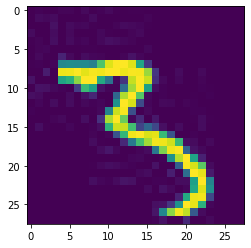

In [35]:
import matplotlib.pyplot as plt 
im = Xtrain[114]
print(Ytrain[114])

plt.imshow(im)
plt.show()

In [36]:
from sklearn.utils import shuffle

Xtrain , Ytrain = shuffle(Xtrain , Ytrain)

#split the data into training and validation set 

from sklearn.model_selection import train_test_split
from keras.datasets import mnist 
(x_train1, y_train1),(x_test,y_test)=mnist.load_data() #test data from MNIST

x_train, y_train  = Xtrain , Ytrain  

In [37]:
import numpy as np 
img_row = x_train[0].shape[0]
img_col = x_train[0].shape[1]

x_train  = np.array(x_train)
#x_test  = np.array(x_test)

x_train=x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test=x_test.reshape(x_test.shape[0], img_row, img_col, 1)

input_shape = (img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


from keras.utils import np_utils 

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [38]:
print(num_classes)

10


In [41]:
#transfer learning using the pre-trainined model from model trained 

from keras.models import load_model
model3_1 = load_model(r"D:\Ananya\IIIT--D\HandWritingRecognition\model2_1.h5")

In [52]:
from keras.models import Sequential, Model
from keras.layers import Input , Dense


for i in range(14):
    model3_1.layers[i].trainable = False


ll = model3_1.layers[16].output
ll = Dense(10,activation="softmax")(ll)
#input_data = Input(shape=(28, 28, 1), name='input')
model3_12 = Model(inputs=model3_1.input,outputs=ll)

In [53]:
model3_12.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256 

In [54]:
from keras.callbacks import ModelCheckpoint
filepath = r"D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model3_11.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [55]:
from keras.optimizers import SGD
model3_12.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
history1 = model3_12.fit(x_train,y_train,batch_size=32,epochs=10, callbacks=callbacks_list ,verbose=1 , validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3264 - accuracy: 0.9022 - val_loss: 0.0464 - val_accuracy: 0.9850

Epoch 00001: val_accuracy improved from -inf to 0.98500, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model3_11.h5
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1069 - accuracy: 0.9662 - val_loss: 0.0439 - val_accuracy: 0.9857

Epoch 00002: val_accuracy improved from 0.98500 to 0.98570, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model3_11.h5
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0951 - accuracy: 0.9696 - val_loss: 0.0422 - val_accuracy: 0.9864

Epoch 00003: val_accuracy improved from 0.98570 to 0.98640, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model3_11.h5
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0911 - accuracy: 0.9706 - val_loss: 0.0424 - val_accuracy: 0.

In [48]:
#architecture:
#training from scratch 
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , MaxPooling2D , Flatten,Dropout , BatchNormalization , Activation
from keras.optimizers import SGD

model3_2 = Sequential()

model3_2.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=input_shape))
model3_2.add(BatchNormalization())
model3_2.add(Activation('relu'))
model3_2.add(MaxPooling2D(pool_size=(2,2)))

model3_2.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model3_2.add(BatchNormalization()) #To re-center and re-scale the layer
model3_2.add(Activation('relu'))
model3_2.add(MaxPooling2D(pool_size=(2,2)))
model3_2.add(Dropout(0.3)) #To reduce over-fitting 

model3_2.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model3_2.add(BatchNormalization())
model3_2.add(Activation('relu'))
model3_2.add(MaxPooling2D(pool_size=(2,2)))
model3_2.add(Dropout(0.3))

model3_2.add(Flatten())
model3_2.add(Dense(128,activation='relu'))
model3_2.add(Dropout(0.2))

model3_2.add(Dense(num_classes,activation = 'softmax'))

model3_2.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

In [49]:
model3_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 12, 12, 64)       

In [50]:
from keras.callbacks import ModelCheckpoint
filepath = r"D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model2_3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [51]:
history2 = model3_2.fit(x_train,y_train,batch_size=32,epochs=10, callbacks=callbacks_list ,verbose=1 , validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 113s 59ms/step - loss: 0.7125 - accuracy: 0.7715 - val_loss: 0.0671 - val_accuracy: 0.9779

Epoch 00001: val_accuracy improved from -inf to 0.97790, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model2_3.h5
Epoch 2/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1424 - accuracy: 0.9543 - val_loss: 0.0551 - val_accuracy: 0.9828

Epoch 00002: val_accuracy improved from 0.97790 to 0.98280, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model2_3.h5
Epoch 3/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1064 - accuracy: 0.9655 - val_loss: 0.0452 - val_accuracy: 0.9850

Epoch 00003: val_accuracy improved from 0.98280 to 0.98500, saving model to D:\Ananya\IIIT--D\HandWritingRecognition\trainPart1\model2_3.h5
Epoch 4/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0898 - accuracy: 0.9701 - val_loss: 0.0440 - val_accuracy:

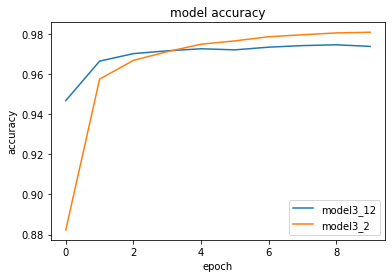

In [56]:
###comparing the models 
# model3_2 : trained from scratch 
# model3_12 : using pretrained model 



### comparing the convergence time 

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model3_12', 'model3_2'], loc='lower right')
plt.show()

In [57]:
#final accuracy
print("Accuracy of the model trained from the scratch is: " + str(history1.history['accuracy'][-1]))
print("Accuracy of the model trained using pretrained model is: " + str(history2.history['accuracy'][-1]))

Accuracy of the model trained from the scratch is: 0.973716676235199
Accuracy of the model trained using pretrained model is: 0.9807666540145874


In [58]:
print("Validation accuracy of the model trained from the scratch is: " + str(history1.history['accuracy'][-1]))
print("Validation accuracy of the model trained using pretrained model is: " + str(history2.history['accuracy'][-1]))

Validation accuracy of the model trained from the scratch is: 0.973716676235199
Validation accuracy of the model trained using pretrained model is: 0.9807666540145874


In [69]:
### Confusion Matrix for model trained from scratch
(x_train, y_train),(x_test,y_test)=mnist.load_data()

img_row = x_test[0].shape[0]
img_col = x_test[0].shape[1]

x_test  = np.array(x_test)

x_test=x_test.reshape(x_test.shape[0], img_row, img_col, 1)

x_test = x_test.astype('float32')

x_test /= 255

In [62]:
pred_class = [] #contains the predicted value 
y_ = y_test[:20]
#y_ contains the true value
for img in x_test[:20]:
    img = img.reshape(1,28,28,1)
    pred_class.append(model3_2.predict_classes(img, verbose=1))
    

1/1 [==============================] - 0s 16ms/step


In [63]:
from sklearn.metrics import confusion_matrix
cm_scratch=confusion_matrix(y_, pred_class)

In [74]:
pred_class = [] #contains the predicted value 
y_ = y_test[:20]
#y_ contains the true value
for img in x_test[:20]:
    img = img.reshape(1,28,28,1)
    predict_prob = model3_12.predict(img, verbose=1)
    predict_classes = np.argmax(predict_prob,axis=1)
    pred_class.append(predict_classes)
    

from sklearn.metrics import confusion_matrix
cm_pretrained=confusion_matrix(y_,pred_class)

1/1 [==============================] - 0s 11ms/step


In [75]:
print("The confusion matrix for the model trained from scratch is : ")
print(cm_scratch)

The confusion matrix for the model trained from scratch is : 
[[3 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4]]


In [76]:
print("The confusion matrix for the model trained from pretrained model is : ")
print(cm_pretrained)

The confusion matrix for the model trained from pretrained model is : 
[[3 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 4]]
